### 反対多数決(反対単記投票)による選好プロファイルの集約
- 各投票者は自身の選好順序において最下位の選択肢に対して，1票だけ投票する。
- 結果として得票数が少ない順に選択肢を並べたときの順序を社会選好順序とする。
- プログラムの実装上は，最下位の選択肢に -1 票を投票するものとして，得票数が多い順に並べる

voter 0: &emsp;a $\succ$ b $\succ$ c  
voter 1: &emsp;a $\succ$ b $\succ$ c  
voter 2: &emsp;a $\succ$ b $\succ$ c  
voter 3: &emsp;a $\succ$ b $\succ$ c  
voter 4: &emsp;a $\succ$ b $\succ$ c  
$\quad \vdots$

votes:  {'a': -90, 'b': -63, 'c': -45}


a $\succ$ b $\succ$ c:&emsp; 30 voters  
a $\succ$ c $\succ$ b:&emsp; 56 voters  
c $\succ$ a $\succ$ b:&emsp; 7 voters  
c $\succ$ b $\succ$ a:&emsp; 28 voters  
b $\succ$ c $\succ$ a:&emsp; 62 voters  
b $\succ$ a $\succ$ c:&emsp; 15 voters

Text(0.5, 0, 'num. vorters, $n$')

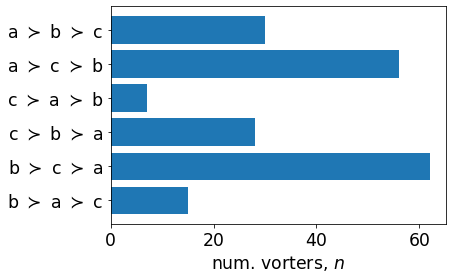

In [1]:
import itertools as it
import numpy as np
# from scipy.stats import randint
import scipy.stats
import matplotlib.pyplot as plt
from IPython.display import display_markdown

plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize'] = 'xx-large' #'large'

alternatives = ('a', 'b', 'c') 
prefs = np.array(tuple(it.permutations(alternatives)))

if True:
    # tally = {('a', 'b', 'c'): 37,
    #          ('a', 'c', 'b'): 37,
    #          ('c', 'a', 'b'): 24,
    #          ('c', 'b', 'a'): 23,
    #          ('b', 'c', 'a'): 41,
    #          ('b', 'a', 'c'): 18}

    tally = {('a', 'b', 'c'): 30,
             ('a', 'c', 'b'): 56,
             ('c', 'a', 'b'): 7,
             ('c', 'b', 'a'): 28,
             ('b', 'c', 'a'): 62,
             ('b', 'a', 'c'): 15}

    profile = np.array(tuple(it.chain.from_iterable(it.repeat(p, v) for p, v in tally.items())))

else:
    num_voters = 100 #5 #0
    profile_idx = scipy.stats.randint.rvs(0, len(prefs), size=num_voters)
    profile = prefs[profile_idx]

    tally = {tuple(p): 0 for p in prefs}
    for p in profile:
        tally[tuple(p)] += 1

pref_str = lambda p: r' $\succ$ '.join(p)
display_markdown('  \n'.join(f'voter {i}: &emsp;' + pref_str(p) for i, p in enumerate(profile) if i < 5)
                 + '  \n' + r'$\quad \vdots$', raw=True)
votes = {x: 0 for x in alternatives}
pos = -1 #0 #
for x in profile[:, pos]:
    votes[x] -= 1
print('votes: ', votes)

display_markdown('  \n'.join(pref_str(k) + f':&emsp;{v: 2d} voters' for k,v in tally.items()), raw=True)

plt.figure()
plt.barh(np.arange(len(tally.keys()))[::-1], 
         np.array(tuple(tally.values())),
         tick_label=[pref_str(k) for k in tally.keys()])
plt.xlabel('num. vorters, $n$')

#### 解説
- 反対多数決は，ほぼ単純多数決(単記投票)と同じなので，解説については単純多数決の Notebook 
(`ch10_plurality_voting.ipynb`) を参照されたい。